<p style="text-align:center">
    <a href="https://www.linkedin.com/company/mt-learners/" target="_blank">
    <img src="https://github.com/Mr-MeerMoazzam/Mr-MeerMoazzam/blob/main/Untitled-2.jpg?raw=true" width="200" alt="MT Learners Logo"  />
    </a>
</p>


## Solving LR Problem by Gradient Descent


## Overview
This notebook aims to tackle a straightforward linear regression problem using gradient descent. Throughout the notebook, we will observe how the learning rate influences the path taken in parameter space. Additionally, we will explore the variations between standard Gradient Descent and Stochastic Gradient Descent (SGD), including the effects of shuffling the data during the SGD process.

In [12]:
# Preliminaries - packages to load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Generate Data from a known distribution
In the following steps, we will create data with a known distribution using a true model in the form of:

$Y = b + \theta_1 X_1 + \theta_2 X_2 + \epsilon$

$X_1$ and $X_2$ have a uniform distribution within the range of $[0,10]$, and the constant is a vector of ones representing the intercept term..
To set actual values for $b$, $\theta_1$, and $\theta_2$, we assign $b$ a value of 1.5, $\theta_1$ a value of 2, and $\theta_2$ a value of 5.


We then generate a vector of 𝑦-values based on the model and compile the predictors into a "feature matrix" called `x_mat`.


In [13]:
np.random.seed(1234)  ## This ensures we get the same data if all of the other parameters remain fixed

num_obs = 100
x1 = np.random.uniform(0,10,num_obs)
x2 = np.random.uniform(0,10,num_obs)
const = np.ones(num_obs)
eps = np.random.normal(0,.5,num_obs)

b = 1.5
theta_1 = 2
theta_2 = 5

y = b*const+ theta_1*x1 + theta_2*x2 + eps

x_mat = np.array([const,x1,x2]).T

## Get the "Right" answer directly
In the below cells we solve for the optimal set of coefficients.  Note that even though the true model is given by:

$b=1.5$, $\theta_1=2$, and $\theta_2=5$

The maximum likelihood (least-squares) estimate from a finite data set may be slightly different.


## Exercise:
Solve the problem two ways: 
1. By using the scikit-learn LinearRegression model
2. Using matrix algebra directly via the formula $\theta = (X^T X)^{-1}X^Ty$



In [14]:
### Solve directly using sklearn
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression(fit_intercept=False)
lr_model.fit(x_mat, y)

lr_model.coef_

array([1.49004618, 1.99675416, 5.01156315])

In [15]:
## Solve by matrix calculation
np.linalg.inv(np.dot(x_mat.T,x_mat)).dot(x_mat.T).dot(y)

array([1.49004618, 1.99675416, 5.01156315])

## Solving by Gradient Descent


In most numerical problems, obtaining the underlying analytical solution is not possible or known. This is because analytical solutions are typically derived by solving mathematical equations manually, which is often impractical. Fortunately, we can approximate a solution through **Gradient Descent**.

This method is incredibly useful because it is employed in the training of Neural Networks and other intricate algorithms. By examining how gradient descent operates on a basic example, we can develop an intuition and comprehend the intricacies involved in configuring parameters such as the learning rate. We will also investigate Stochastic Gradient Descent and compare its behavior with that of the conventional approach.

## Exercise

The following code cells contain instructions for performing (full-batch) gradient descent. Some parameters have been left blank for you to complete.

1. Select a learning rate and a specified number of iterations, execute the code, and plot the trajectory of your gradient descent.
2. Identify instances where the learning rate is too low, too high, and optimal.
3. Observe the loss function plots corresponding to these scenarios.


In [16]:
## Parameters to play with 
learning_rate = 1e-3
num_iter = 10000
theta_initial = np.array([3,3,3])

In [17]:
def gradient_descent(learning_rate, num_iter, theta_initial):

    ## Initialization steps
    theta = theta_initial
    theta_path = np.zeros((num_iter+1,3))
    theta_path[0,:]= theta_initial

    loss_vec = np.zeros(num_iter)

    ## Main Gradient Descent loop (for a fixed number of iterations)
    for i in range(num_iter):
        y_pred = np.dot(theta.T,x_mat.T)
        loss_vec[i] = np.sum((y-y_pred)**2)
        grad_vec = (y-y_pred).dot(x_mat)/num_obs  #sum up the gradients across all observations and divide by num_obs
        grad_vec = grad_vec
        theta = theta + learning_rate*grad_vec
        theta_path[i+1,:]=theta
    return theta_path, loss_vec

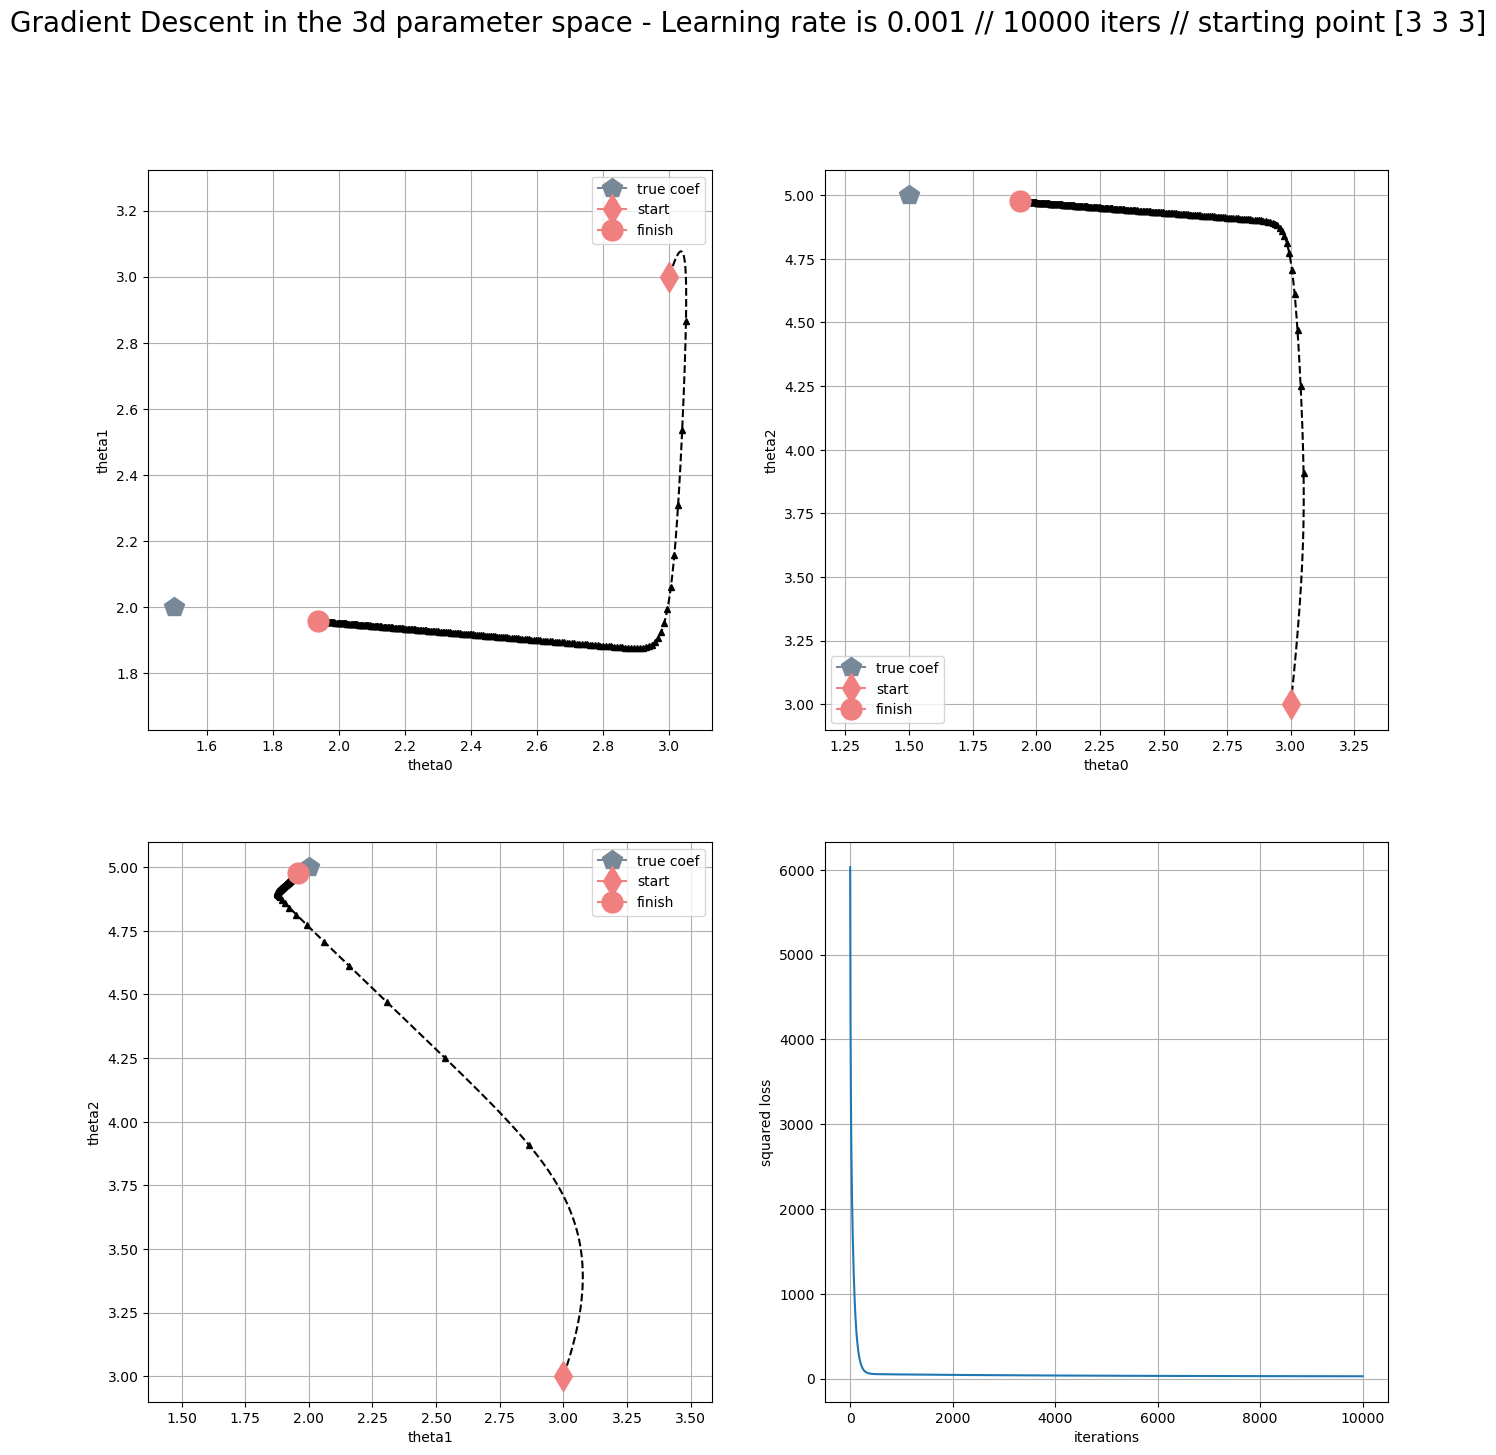

In [18]:
true_coef = [b, theta_1, theta_2]

def plot_ij(theta_path, i, j, ax):
    ax.plot(true_coef[i], true_coef[j],
            marker='p', markersize=15, label='true coef', 
            color='#778899')
    ax.plot(theta_path[:, i],theta_path[:, j],
            color='k', linestyle='--', marker='^', 
            markersize=5, markevery=50)
    ax.plot(theta_path[0, i], theta_path[0, j], marker='d', 
            markersize=15, label='start', color='#F08080')
    ax.plot(theta_path[-1, i], theta_path[-1, j], marker='o', 
            markersize=15, label='finish', color='#F08080')
    ax.set(
        xlabel='theta'+str(i),
        ylabel='theta'+str(j))
    ax.axis('equal')
    ax.grid(True)
    ax.legend(loc='best')
    

def plot_all(theta_path, loss_vec, learning_rate, num_iter, theta_initial, gdtype='Gradient Descent'):
    fig = plt.figure(figsize=(16, 16))
    title = '{gdtype} in the 3d parameter space - Learning rate is {lr} // {iters} iters // starting point {initial}'
    title = title.format(gdtype=gdtype, lr=learning_rate, 
                         iters=num_iter, initial=theta_initial)
    fig.suptitle(title, fontsize=20)
    ax = fig.add_subplot(2, 2, 1)
    plot_ij(theta_path, 0, 1, ax)
    ax = fig.add_subplot(2, 2, 2)
    plot_ij(theta_path, 0, 2, ax)
    ax = fig.add_subplot(2, 2, 3)
    plot_ij(theta_path, 1, 2, ax)
    ax = fig.add_subplot(2, 2, 4)
    ax.plot(loss_vec)
    ax.set(xlabel='iterations', ylabel='squared loss')
    ax.grid(True)
    

theta_path, loss_vec = gradient_descent(learning_rate, num_iter, theta_initial)
plot_all(theta_path, loss_vec, learning_rate, num_iter, theta_initial)



## Stochastic Gradient Descent
Instead of computing the average gradient over the entire dataset before updating the parameters, we will now update the parameters for each data point in the set. While each step will be somewhat exaggerated, the steps should average out over time.  


## Exercise
The following code implements Stochastic Gradient Descent, but it goes through the data in the same order every time.

1. Execute the code and generate the plots. What observations do you make?
2. Alter the code so that it randomly reorders the data. How do the sample trajectories differ?


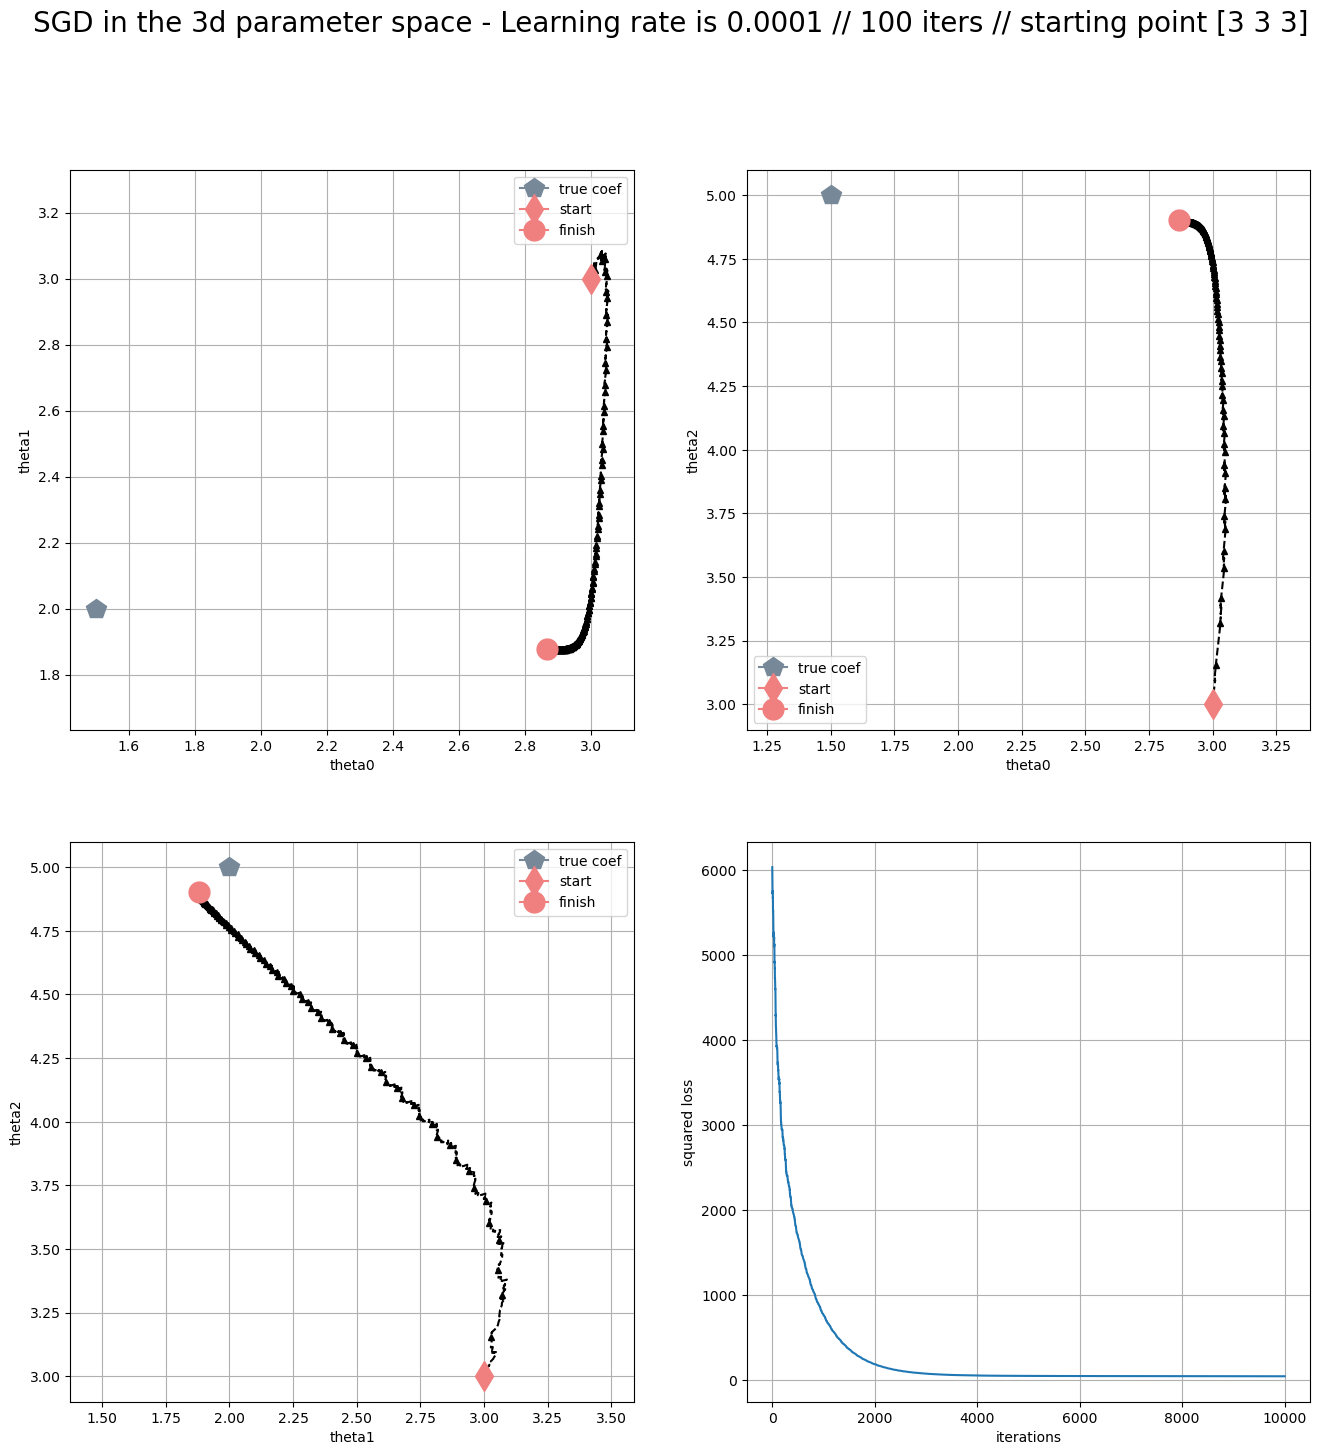

In [19]:
def stochastic_gradient_descent(learning_rate, num_iter, theta_initial):

    ## Initialization steps
    theta = theta_initial
    # below are different in STOCHASTIC gradient descent
    theta_path = np.zeros(((num_iter*num_obs)+1,3))
    theta_path[0,:] = theta_initial
    loss_vec = np.zeros(num_iter*num_obs)

    ## Main SGD loop
    count = 0
    for i in range(num_iter):
        for j in range(num_obs):
            count+=1
            y_pred = np.dot(theta.T,x_mat.T)
            loss_vec[count-1] = np.sum((y-y_pred)**2)
            grad_vec = (y[j]-y_pred[j])*(x_mat[j,:])
            theta = theta + learning_rate*grad_vec
            theta_path[count,:]=theta
    return theta_path, loss_vec

## Parameters to play with
learning_rate = 1e-4
num_iter = 100
theta_initial = np.array([3, 3, 3])


theta_path, loss_vec = stochastic_gradient_descent(learning_rate, 
                                                   num_iter, 
                                                   theta_initial)
plot_all(theta_path, loss_vec, learning_rate, 
         num_iter, theta_initial, 'SGD')

Play with the parameters below and observe the trajectory it results in


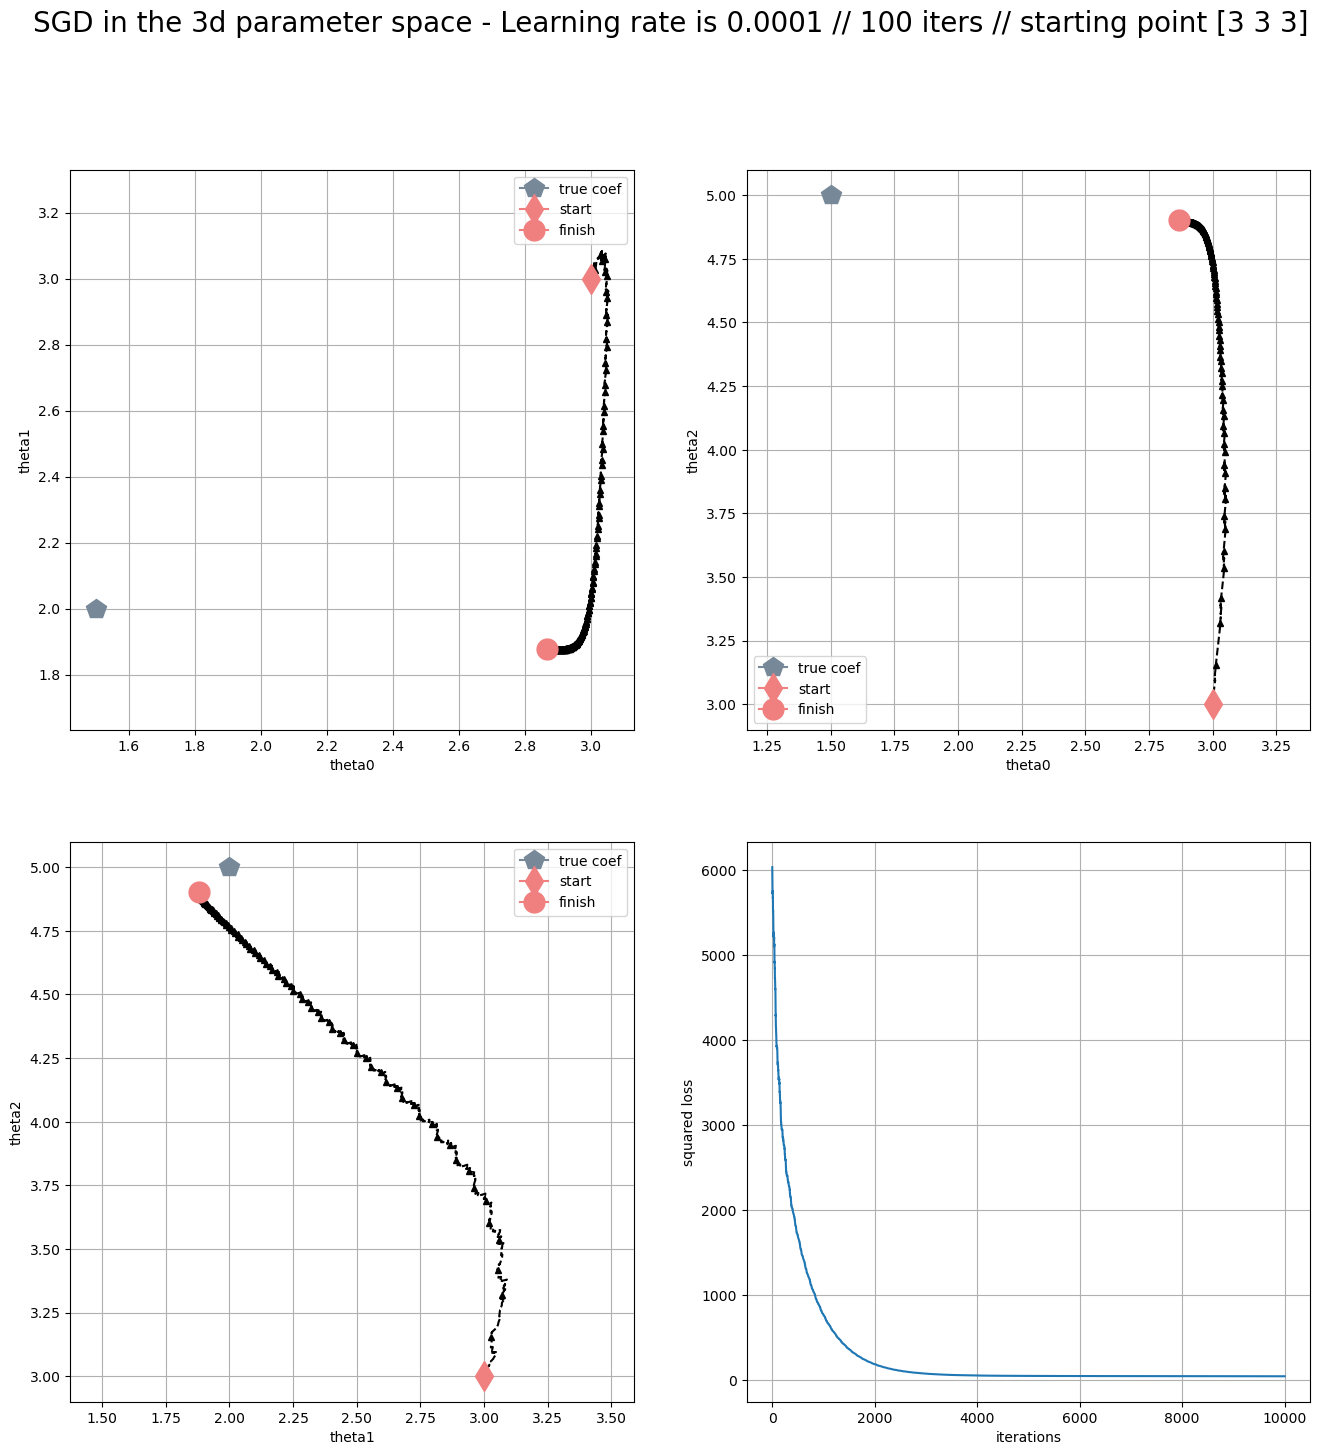

In [20]:
## Parameters to play with
learning_rate = 1e-4
num_iter = 100
theta_initial = np.array([3,3,3])


theta_path, loss_vec = stochastic_gradient_descent(learning_rate, 
                                                   num_iter, 
                                                   theta_initial)
plot_all(theta_path, loss_vec, learning_rate, num_iter, 
         theta_initial, 'SGD')